In [1]:
from questions import questions

print(len(questions))

100


C:\Users\hp\AppData\Local\Temp\ipykernel_19552\713694802.py:7: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the langchain-huggingface package and should be used instead. To use it run `pip install -U langchain-huggingface` and import as `from langchain_huggingface import HuggingFaceEmbeddings`.
  embedding_model = HuggingFaceEmbeddings(
c:\Users\hp\Desktop\IT-Support-RAG-Assistant\venv\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:11: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange
c:\Users\hp\Desktop\IT-Support-RAG-Assistant\venv\Lib\site-packages\huggingface_hub\file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If

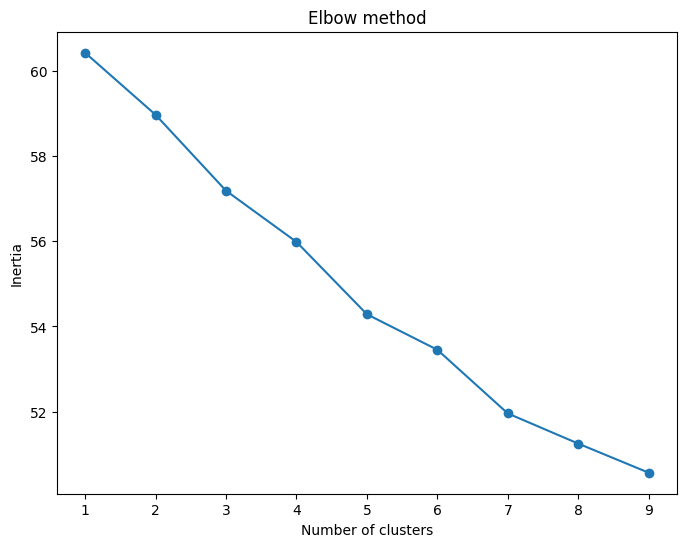

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from langchain.embeddings import HuggingFaceEmbeddings


embedding_model = HuggingFaceEmbeddings(
    model_name = "sentence-transformers/all-MiniLM-L6-v2"
)

question_vectors = embedding_model.embed_documents(questions)

QV = np.array(question_vectors)

inertias = []

for i in range(1,10):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init="auto")
    kmeans.fit(QV)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(range(1,10), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [4]:
import joblib
import os

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit_predict(QV)
path_output = "C:/Users/hp/Desktop/IT-Support-RAG-Assistant/cluster/models"

joblib.dump(kmeans, os.path.join(path_output,'kmeans_model.pkl' ))

print("le modele est sauvgarde")


le modele est sauvgarde
